# DATA SCIENCE PROJECT: Analysis of CRIME AGAINST WOMEN IN INDIA (2022)

Analysis of Crimes Against Women in India: A 2022 Overview
Focus: A comprehensive analysis of the crime landscape in India in 2022, identifying the most prevalent types of crimes, hotspots, and emerging trends.

Includes: Descriptive statistics, data visualization, crime category breakdown.

Importing libraries to be used 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SOURCE OF DATASET

### Source: National Crime Records Bureau (NCRB), Ministry of Home Affairs, Government of India. Crime in India 2022 Report. https://ncrb.gov.in (Accessed: April 2025).

In [3]:

# Reading DataSet
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
print("Data imported succesfully")

Data imported succesfully


Top Rows of Dataset

In [4]:
data.head()

,S. No,State,District,Murder with Rape,Dowry Deaths,Suicide of Women,Miscarriage,Acid Attack,Cruelty by Inlaws,Kidnapping & Abduction of Women,...,Cyber Crimes,Publishing or Transmitting of Sexually Explicit Material,Other Women Centric Cyber Crimes,Protection of Children from Sexual Violence Act \n,Child Rape,Sexual Assault of Children,Sexual Harassment,Use of Child for Pornography,POCSO Act,Indecent Representation
0,1,Andhra Pradesh,Alluri Sitharama Raju,1,2,2,0,0,58,0,...,1,1,0,13,13,0,0,0,0,0
1,2,Andhra Pradesh,Anakapalli,0,5,4,0,0,276,25,...,0,0,0,58,32,26,0,0,0,0
2,3,Andhra Pradesh,Anantapuramu,0,2,19,0,0,343,21,...,8,7,1,65,34,4,27,0,0,0
3,4,Andhra Pradesh,Annamayya,0,2,6,0,0,362,2,...,1,1,0,37,27,5,5,0,0,0
4,5,Andhra Pradesh,Bapatla,0,3,9,0,0,447,6,...,0,0,0,56,32,14,8,2,0,0


Information about Dataset used:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 46 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   S. No                                                                        934 non-null    int64 
 1   State                                                                        934 non-null    object
 2   District                                                                     934 non-null    object
 3   Murder with Rape                                                             934 non-null    int64 
 4   Dowry Deaths                                                                 934 non-null    int64 
 5   Suicide of Women                                                             934 non-null    int64 
 6   Miscarriage                                       

Statistics of Data

In [6]:
data.describe()

,S. No,Murder with Rape,Dowry Deaths,Suicide of Women,Miscarriage,Acid Attack,Cruelty by Inlaws,Kidnapping & Abduction of Women,Kidnapping & Abduction for Murder,Kidnapping for Ransom,...,Cyber Crimes,Publishing or Transmitting of Sexually Explicit Material,Other Women Centric Cyber Crimes,Protection of Children from Sexual Violence Act \n,Child Rape,Sexual Assault of Children,Sexual Harassment,Use of Child for Pornography,POCSO Act,Indecent Representation
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,467.500000,0.265525,6.905782,5.313704,0.252677,0.132762,149.913276,91.338330,0.071734,0.085653,...,3.147752,2.410064,0.737687,66.482869,40.161670,21.942184,2.849036,0.714133,0.785867,0.029979
std,269.766875,1.136998,11.396475,8.240691,1.237312,0.498161,230.058527,126.646824,0.530115,0.484649,...,8.310275,7.070003,3.825891,76.559522,46.406131,32.502335,9.622885,5.806515,5.041221,0.440647
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,234.250000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,467.500000,0.000000,2.000000,2.000000,0.000000,0.000000,47.500000,40.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,51.000000,29.000000,11.000000,0.000000,0.000000,0.000000,0.000000
75%,700.750000,0.000000,9.000000,8.000000,0.000000,0.000000,200.750000,128.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,94.000000,57.000000,31.750000,2.000000,0.000000,0.000000,0.000000
max,934.000000,18.000000,88.000000,87.000000,25.000000,5.000000,1704.000000,1164.000000,9.000000,8.000000,...,103.000000,103.000000,75.000000,1137.000000,615.000000,489.000000,198.000000,148.000000,86.000000,10.000000


CHECKING MISSING/NULL VALUES

In [7]:
print("\nMissing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())


Missing Values:
 S. No                                                                          0
State                                                                          0
District                                                                       0
Murder with Rape                                                               0
Dowry Deaths                                                                   0
Suicide of Women                                                               0
Miscarriage                                                                    0
Acid Attack                                                                    0
Cruelty by Inlaws                                                              0
Kidnapping & Abduction of Women                                                0
Kidnapping & Abduction for Murder                                              0
Kidnapping for Ransom                                                          0
Kidnapping

## Objective 1: Identifying High Risk States for Women
### The first objective of our analysis is to identify the high-risk states in India based on the incidence of crimes against women in 2022. This analysis will allow us to determine which regions have higher rates of violence or crimes affecting women and could provide useful insights for policy interventions, resource allocation, and awareness campaigns.

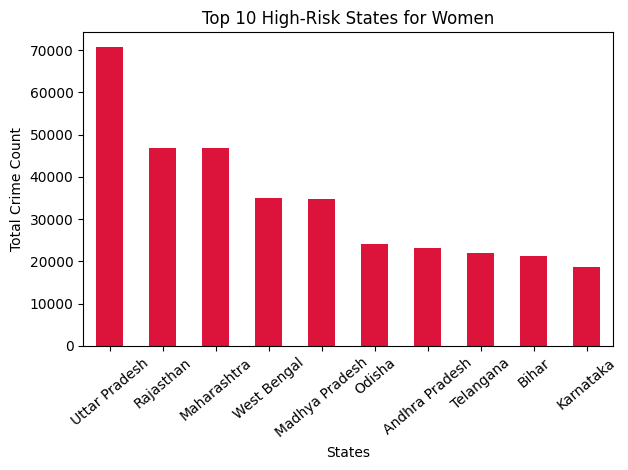

In [8]:
#using column indexes instead of names./ we can also use iloc function here.
cols = data.columns[[3,4,5,6,7,8,9,16,19,22,28,29,30,31,32,33,34,35,36,37,38,39,41,44,45]]


statewise_crime = data.groupby("State")[cols].sum()

#new column of total crime(sum of crime per state)
statewise_crime["Total_Crimes"] = statewise_crime.sum(axis=1)

top_risk_states = statewise_crime.sort_values("Total_Crimes", ascending=False)

# Plot
top_risk_states["Total_Crimes"].head(10).plot(kind='bar', color='crimson')
plt.title("Top 10 High-Risk States for Women")
plt.ylabel("Total Crime Count")
plt.xlabel("States")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

## Objective 2: Correlation Between Female Suicides and Cruelty by In-laws

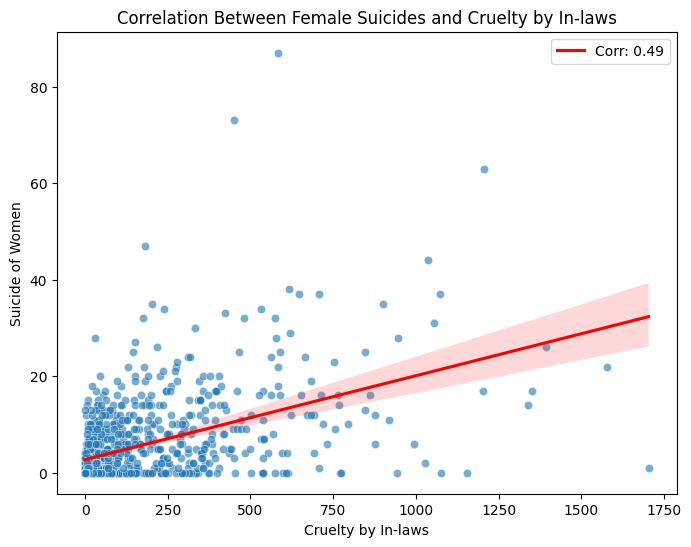

np.float64(0.4853192981016867)

In [9]:

suicide_col = "Suicide of Women"
cruelty_col = "Cruelty by Inlaws"

# Compute correlation
correlation_value = data[[suicide_col, cruelty_col]].corr().iloc[0, 1]

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=cruelty_col, y=suicide_col, alpha=0.6)
sns.regplot(data=data, x=cruelty_col, y=suicide_col, scatter=False, color="red", label=f"Corr: {correlation_value:.2f}")
plt.title("Correlation Between Female Suicides and Cruelty by In-laws")
plt.xlabel("Cruelty by In-laws")
plt.ylabel("Suicide of Women")
plt.legend()
plt.show()

correlation_value


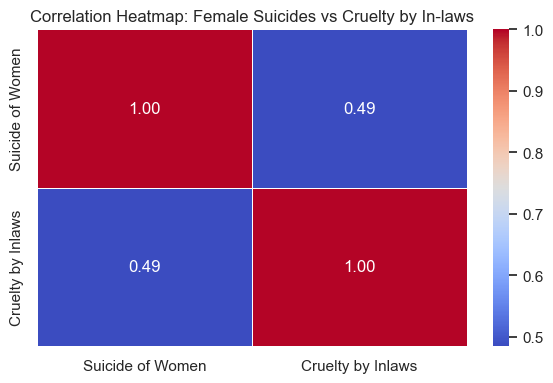

In [10]:
df_relevant = data[['Suicide of Women', 'Cruelty by Inlaws']]

# Drop any rows with missing data in these columns
df_relevant = df_relevant.dropna()

# Calculate the Pearson correlation coefficient
correlation = df_relevant.corr(method='pearson')



# Set the plot size and style
plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')

# Draw the heatmap
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Female Suicides vs Cruelty by In-laws")
plt.tight_layout()
plt.show()

Top 10 Most Prevalent Crimes Against Women:

Cruelty by Inlaws                                             140019
Kidnapping & Abduction of Women                                85310
Assault on Women with Intent to Outrage her Modesty            83344
Assault on Women (18 Yrs. And above)                           80964
Protection of Children from Sexual Violence Act \n             62095
Child Rape                                                     37511
Rape                                                           31516
Rape of Women (above 18)                                       30512
Kidnapping & Abduction of Women to compel her for marriage     28656
Sexual Assault of Children                                     20494
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13864\250554476.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='magma')


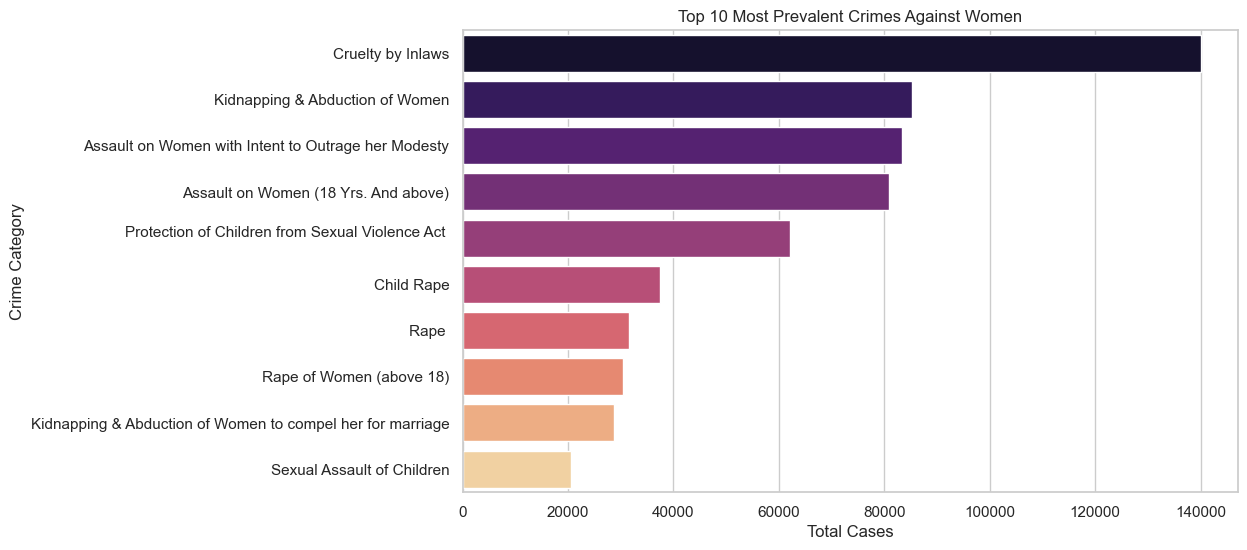

In [11]:
crime_data = data.iloc[:, 3:]

# Sum all values per crime category
crime_totals = crime_data.sum().sort_values(ascending=False)

# Display top 10 most prevalent crimes
top_10_crimes = crime_totals.head(10)
print("Top 10 Most Prevalent Crimes Against Women:\n")
print(top_10_crimes)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette='magma')
plt.title('Top 10 Most Prevalent Crimes Against Women')
plt.xlabel('Total Cases')
plt.ylabel('Crime Category')
plt.show()

<html>

In [12]:
print("\nColumns:", data.columns.tolist())


Columns: ['S. No', 'State', 'District', 'Murder with Rape', 'Dowry Deaths', 'Suicide of Women', 'Miscarriage', 'Acid Attack', 'Cruelty by Inlaws', 'Kidnapping & Abduction of Women', 'Kidnapping & Abduction for Murder', 'Kidnapping for Ransom', 'Kidnapping & Abduction of Women to compel her for marriage', 'Procuration of Minor Girls', 'Importation of Girls from Foreign Country ', 'Human Trafficking', 'Rape ', 'Rape of Women (above 18)', 'Rape of Women (Below 18)', 'Attempt to Commit Rape', 'Attempt to rape Women (above 18)', 'Attempt to rape Girls (Below 18)', 'Assault on Women with Intent to Outrage her Modesty', 'Assault on Women (18 Yrs. And above)', 'Assualt on Girls (Below 18 yrs)', 'Insult to the Modesty of Women \n', 'insult to modesty Women (18 Yrs. And above)', 'insult to modesty Girls (Below 18 yrs)', 'Dowry Prohibition Act', 'Immoral Traffic ', 'Procuring, inducing Children for the sake of prostitution (Section 5)', 'Detaining a person in premises where prostitution is carri

C:\Users\HP\AppData\Local\Temp\ipykernel_13864\2709121362.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_comparison.index, y=crime_comparison.values,palette=['red', 'blue'])


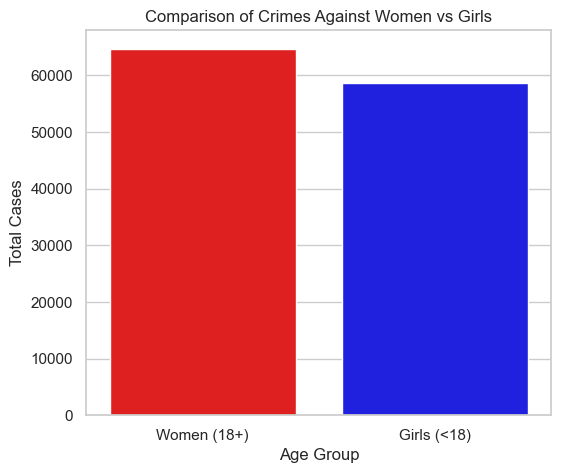

In [19]:
# Columns related to crimes against different age groups
adult_crimes = ['Rape ', 'Rape of Women (above 18)', 'Sexual Harassment']
minor_crimes = ['Child Rape', 'Sexual Assault of Children', 'Use of Child for Pornography']


# Sum total crimes in each category
adult_total = data[adult_crimes].sum().sum()
minor_total = data[minor_crimes].sum().sum()

# Prepare data for plotting
crime_comparison = pd.Series({'Women (18+)': adult_total, 'Girls (<18)': minor_total})

# Plotting
plt.figure(figsize=(6, 5))
sns.barplot(x=crime_comparison.index, y=crime_comparison.values,palette=['red', 'blue'])
plt.title('Comparison of Crimes Against Women vs Girls')
plt.ylabel('Total Cases')
plt.xlabel('Age Group')

plt.show()


🛡️ Top 10 Safest Districts (Least Crimes Reported Against Women):

             State                  District  Total_Crimes
0       Puducherry                  Karaikal             0
1  Jammu & Kashmir              CICE Kashmir             0
2  Jammu & Kashmir                CICE Jammu             0
3  Jammu & Kashmir  Special Crime Wing Jammu             0
4  Jammu & Kashmir               EOW Kashmir             0


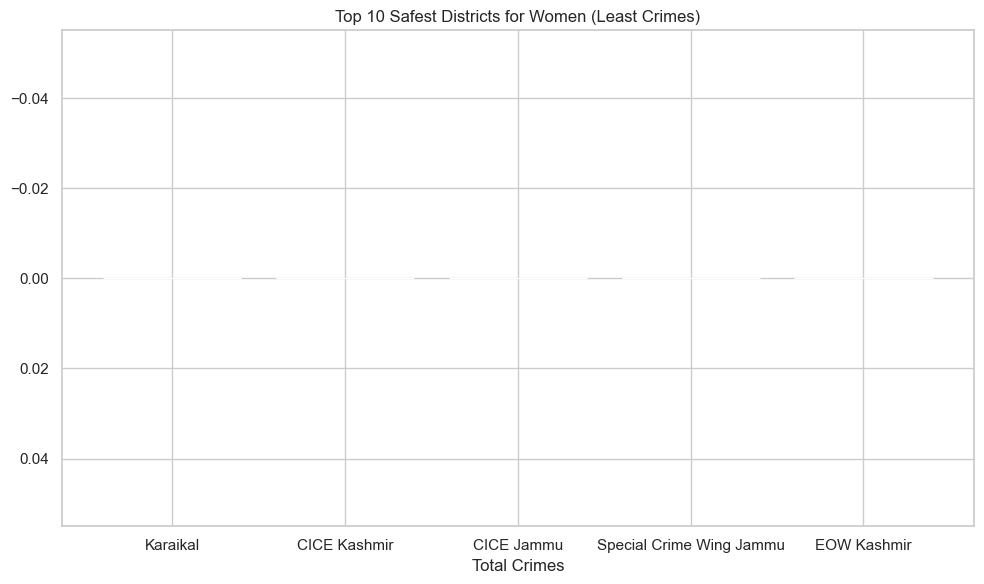

In [14]:


# Get all crime columns (assuming they start from the 4th column)
crime_columns = data.columns[3:]

# Filter only numeric crime data
crime_data = data[crime_columns].select_dtypes(include='number')

# Sum total crimes per district
data["Total_Crimes"] = crime_data.sum(axis=1)

# Sort districts by lowest total crimes
safest_districts = data.sort_values(by="Total_Crimes").reset_index(drop=True)

# Show top 10 safest districts
top_10_safest = safest_districts[["State", "District", "Total_Crimes"]].head(5)
print("🛡️ Top 10 Safest Districts (Least Crimes Reported Against Women):\n")
print(top_10_safest)

plt.figure(figsize=(10, 6))
plt.bar(top_10_safest["District"], top_10_safest["Total_Crimes"], color='green')
plt.xlabel("Total Crimes")
plt.title("Top 10 Safest Districts for Women (Least Crimes)")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

🔗 Top 10 Most Correlated Crime Pairs Among Top 15 Categories:

Assault on Women (18 Yrs. And above)  Assault on Women with Intent to Outrage her Modesty    0.993833
Rape                                  Rape of Women (above 18)                               0.990536
Child Rape                            Protection of Children from Sexual Violence Act \n     0.936725
Total_Crimes                          Assault on Women with Intent to Outrage her Modesty    0.871203
Assault on Women (18 Yrs. And above)  Total_Crimes                                           0.867700
Total_Crimes                          Protection of Children from Sexual Violence Act \n     0.840738
Cruelty by Inlaws                     Total_Crimes                                           0.812041
Kidnapping & Abduction of Women       Total_Crimes                                           0.765438
Rape of Women (above 18)              Total_Crimes                                           0.756896
Total_Crimes       

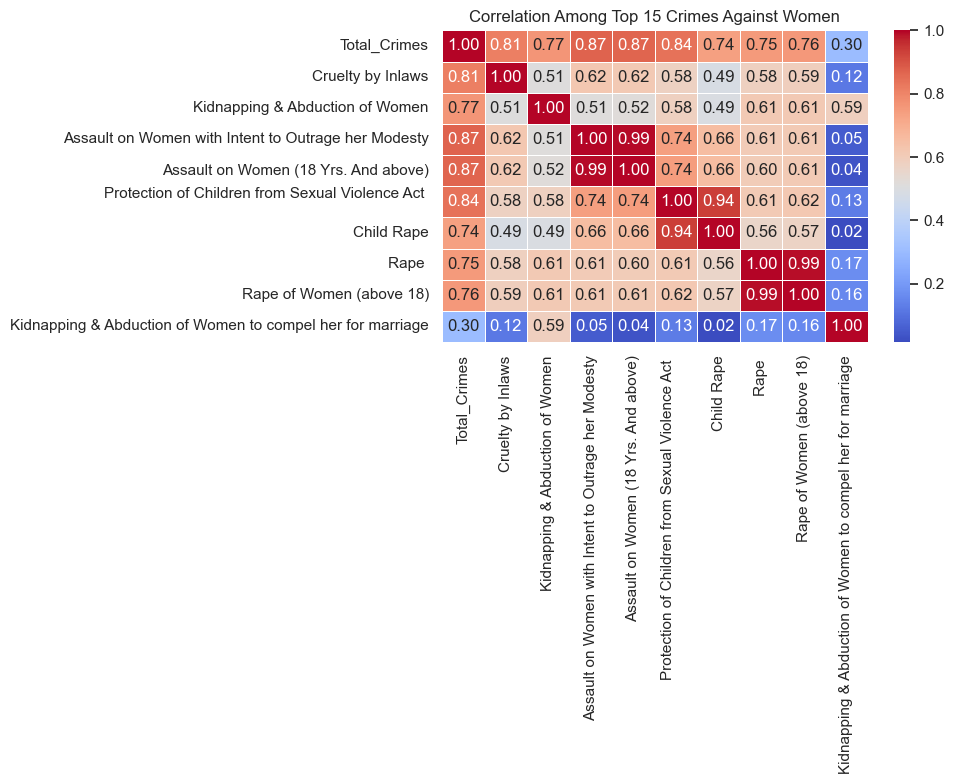

In [15]:
crime_data = data.iloc[:, 3:]

# Get top 15 crimes based on total counts
top_15_crimes = crime_data.sum().sort_values(ascending=False).head(10).index.tolist()

# Create correlation matrix for these top 15
filtered_corr = crime_data[top_15_crimes].corr()

# Get top correlated crime pairs (excluding self-correlation)
corr_unstacked = filtered_corr.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
corr_sorted = corr_unstacked.sort_values(ascending=False).drop_duplicates()

# Show top 10 correlated pairs
top_10_pairs = corr_sorted.head(10)
print("🔗 Top 10 Most Correlated Crime Pairs Among Top 15 Categories:\n")
print(top_10_pairs)

# Optional: Small heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Among Top 15 Crimes Against Women")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13864\1294640969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution (%)', y=state_crime_sorted.index, data=state_crime_sorted, palette='viridis')


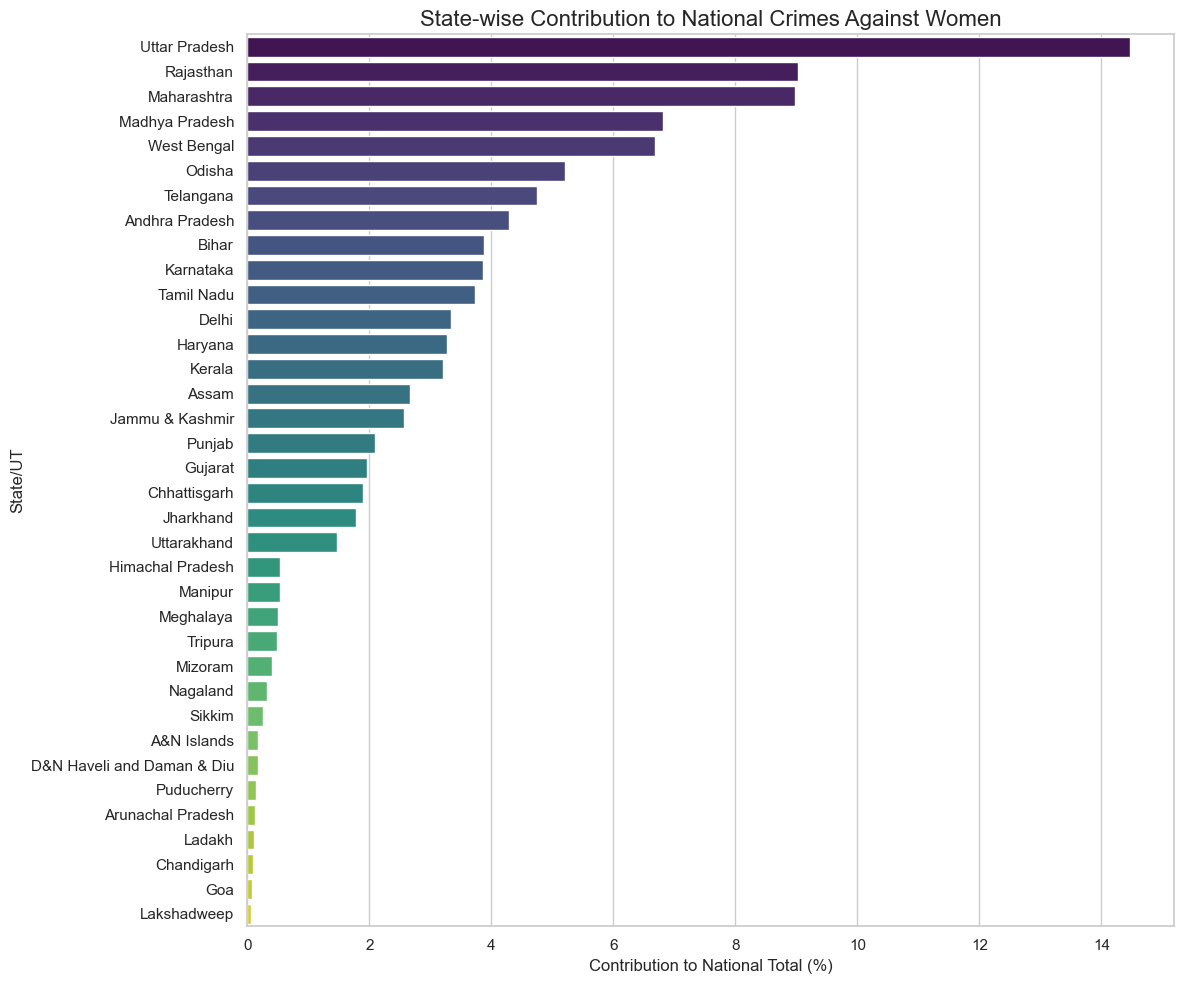

In [16]:

exclude_cols = ['SNo', 'Year', 'State/UT', 'District']
crime_cols = [col for col in data.columns if col not in exclude_cols and data[col].dtype in ['int64', 'float64']]

# Group by State and sum all crimes
state_crime_totals = data.groupby('State')[crime_cols].sum()
state_crime_totals['Total'] = state_crime_totals.sum(axis=1)

# Calculate national total
national_total = state_crime_totals['Total'].sum()

# Add percentage contribution
state_crime_totals['Contribution (%)'] = (state_crime_totals['Total'] / national_total) * 100

# Sort by contribution
state_crime_sorted = state_crime_totals.sort_values(by='Contribution (%)', ascending=False)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Contribution (%)', y=state_crime_sorted.index, data=state_crime_sorted, palette='viridis')
plt.title('State-wise Contribution to National Crimes Against Women', fontsize=16)
plt.xlabel('Contribution to National Total (%)')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

Data imported succesfully


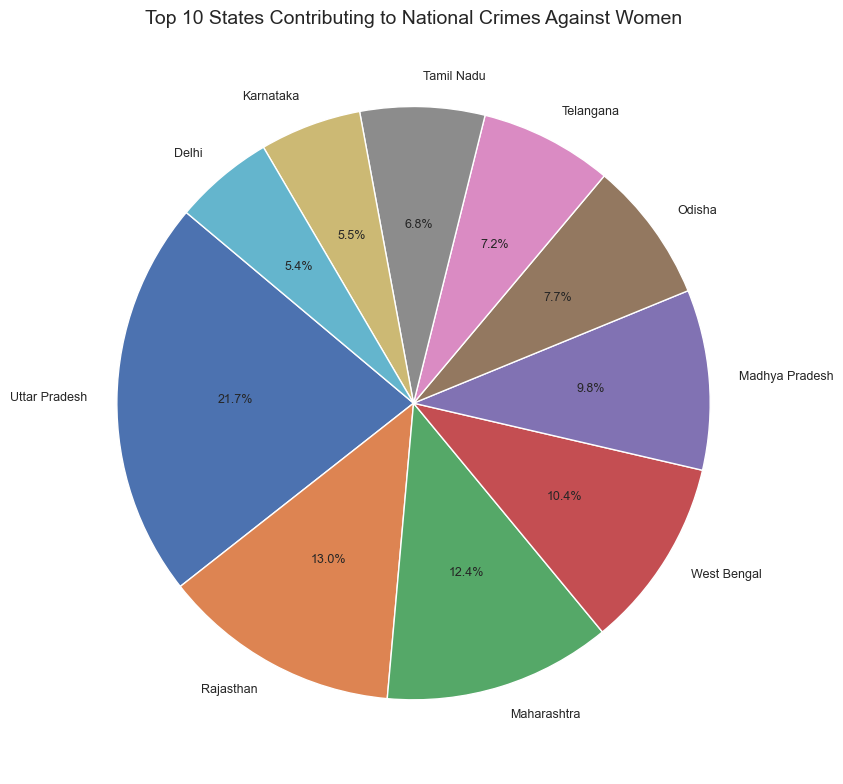

In [17]:
#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading DataSet
data=pd.read_excel("C:/Users/HP/Desktop/PROJECT/CrimeAgainstWomen2022/Project_Dataset.xlsx")
print("Data imported succesfully")
exclude_cols = ['SNo', 'Year', 'State/UT', 'District']
crime_cols = [col for col in data.columns if col not in exclude_cols and data[col].dtype in ['int64', 'float64']]

# Group by State/UT and calculate total crimes
state_crimes = data.groupby('State')[crime_cols].sum()
state_crimes['Total Crimes'] = state_crimes.sum(axis=1)

# Sort and get top 10 states
top10_states = state_crimes['Total Crimes'].sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(top10_states, labels=top10_states.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9})
plt.title('Top 10 States Contributing to National Crimes Against Women', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13864\2518742186.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=safest_states_by_rate.index, x=safest_states_by_rate['Crime Rate (per 100k women)'], palette='Greens_r')


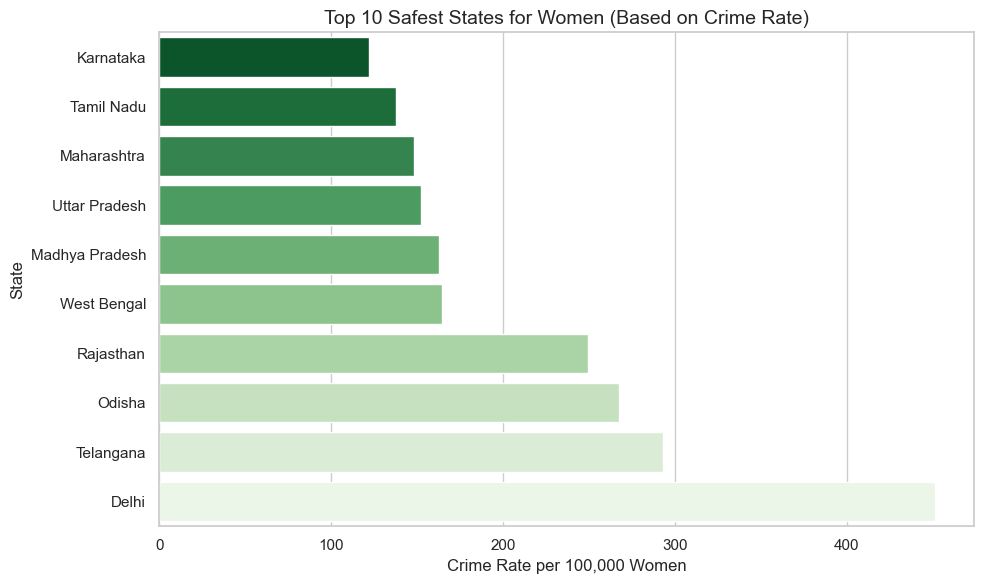

In [18]:
# Sample female population data (replace with actual values if available)
female_population = {
    'Uttar Pradesh': 104000000,
    'Rajasthan': 38000000,
    'Maharashtra': 61000000,
    'West Bengal': 46000000,
    'Madhya Pradesh': 44000000,
    'Odisha': 21000000,
    'Telangana': 18000000,
    'Tamil Nadu': 36000000,
    'Karnataka': 33000000,
    'Delhi': 8800000,
    # Add more states...
}
# Group crimes by state and calculate total
state_crimes = data.groupby('State')[crime_cols].sum()
state_crimes['Total Crimes'] = state_crimes.sum(axis=1)

# Convert population dictionary to DataFrame
pop_df = pd.DataFrame.from_dict(female_population, orient='index', columns=['Female Population'])
pop_df.index.name = 'State'

# Merge population with crime data
merged_data = state_crimes.merge(pop_df, left_index=True, right_index=True)

# Calculate crime rate per 100,000 women
merged_data['Crime Rate (per 100k women)'] = (merged_data['Total Crimes'] / merged_data['Female Population']) * 100000

# Get 10 safest states based on crime rate
safest_states_by_rate = merged_data.sort_values(by='Crime Rate (per 100k women)', ascending=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=safest_states_by_rate.index, x=safest_states_by_rate['Crime Rate (per 100k women)'], palette='Greens_r')
plt.xlabel('Crime Rate per 100,000 Women')
plt.ylabel('State')
plt.title('Top 10 Safest States for Women (Based on Crime Rate)', fontsize=14)
plt.tight_layout()
plt.show()
